# Approximating a sigmoid with ReLUs

We attempt to approximate a function
$$ y = \sigma(b +mx)\,,\qquad x\in\mathbb R\,,$$
where $b$ and $m$ are fixed parameters,
with a univariate function which is the linear combination of `ReLU`s, using a two-layer net, i.e. with a single hidden layer.

The approximation is obtained by gradient descent.


# Observations
The learning rate must be chosen small (`0.00002`) to prevent gradients fron diverging.  As a result, since the architecture is shallow, we need a relatively wide hidden layer (e.g. `1_000`) and a relatively large number of iteration (e.g. `20_000`).

# References
- [Two-layer net module](https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_module.html) (pytorch tutorial)

---
tags: pytorch, tutorial, module, net, function approximation, sigmoid, relu, mlp, multi-layer perceptron

In [1]:
from tqdm import tqdm
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
%matplotlib inline

# Helper functions

In [2]:
def mse(preds, targs):
    return ((preds - targs)**2).sum()

# Architecture

In [3]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, D_H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, D_H)
        self.linear2 = torch.nn.Linear(D_H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred

# Data

In [4]:
w = 20.
s = 1.
b = -s*w
x = torch.linspace(-4, 4, 101).view(-1, 1)
with torch.no_grad():
    targs = (b+w*x).sigmoid()

# Initialize model

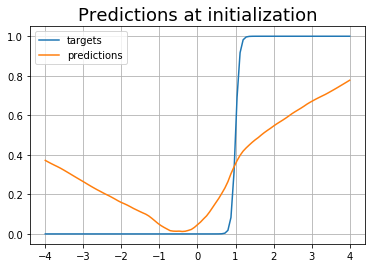

In [5]:
net = TwoLayerNet(1, 1_000, 1)

preds = net(x) # predictions at initialization

plt.plot(x, targs, label='targets')
plt.plot(x, net(x).detach().numpy(), label='predictions')
plt.legend();
plt.grid();
plt.title("Predictions at initialization", fontsize=18);

# Train

In [6]:
losses = []
weights = []
biases = []

In [7]:
lr = .00002 # learning rate
n_iters = 20_000#20_000

for _ in tqdm(range(n_iters)):
    preds = net.forward(x)
    loss = mse(preds, targs)
    loss.backward()
    
    for param in net.parameters():
        with torch.no_grad():
            param -= lr*param.grad
        param.grad.zero_() 
    losses.append(loss.item())

100%|██████████| 20000/20000 [00:11<00:00, 1728.48it/s]


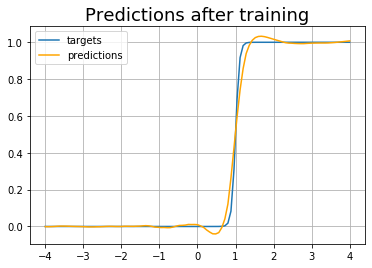

In [8]:
preds = net(x)

plt.plot(x, targs, label='targets')
plt.plot(x, net(x).detach().numpy(), label='predictions', color='Orange')
plt.legend();
plt.grid();
plt.title("Predictions after training", fontsize=18);

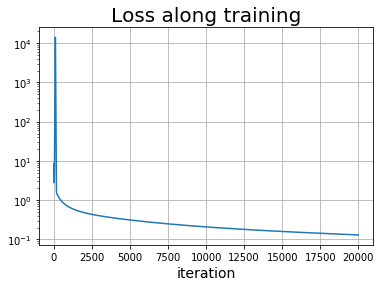

In [9]:
plt.plot(losses, '-')
# plt.ylim(0, 10)
plt.yscale('log')
plt.title("Loss along training", fontsize=20)
plt.grid();
plt.xlabel('iteration', fontsize=14);

Note how slow the loss decays over the iteration: less than exponential.